In [22]:
import scipy.io
import numpy as np
import itertools
from scipy.fftpack import fft, fftfreq
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
from random import randint
import sklearn.linear_model as linear_model
import sklearn.preprocessing as prep
import math
from sklearn.pipeline import make_pipeline
from scipy import stats
import csv

In [23]:
## import dataset
mat = scipy.io.loadmat('SSVEPDataset.mat')
data = mat['subject'][0]
number_of_subjects = len(data)
number_of_conditions = len(data[0])
number_of_samplings = len(data[0][0])
print "Data includes", number_of_subjects, "subjects :"
print "(", number_of_conditions, "conditions per subject )"
print "(", number_of_samplings, "samplings per condition )"
#print data

Data includes 12 subjects :
( 5 conditions per subject )
( 15000 samplings per condition )


In [24]:
def get_data(data, condition_id):

    #get data
    data_selected = np.zeros((number_of_subjects, number_of_samplings-number_of_filter_out_samplings))
    for i, d in enumerate(data):
        #one loop is one subject
        join_list = list(itertools.chain.from_iterable(d[condition_id-1]))

        #bandpass filter
        nyq = 0.5 * number_of_samplings_per_sec
        low = 7 / nyq
        high = 8 / nyq
        order = 2
        b, a = butter(order, [low, high], btype='band')
        f = lfilter(b, a, join_list)

        #filter out first-nine second
        data_selected[i] = f[number_of_filter_out_samplings:]

    print "Select data from condition #", condition_id
    print "Size of data is", len(data_selected), "subjects with", len(data_selected[0]), "samplings per subject."
    
    return data_selected

In [105]:
def perform_fft(data_selected):

    #FFT
    for i, d in enumerate(data_selected):
        print "==== FFT with subjects #", i, "===="
        for index in range(0, number_of_slide_windows):
            #one loop per window
#             print "From second #", index, "to", index+window_size-1,"( sampling no.", \
#                     index*number_of_samplings_per_sec, "to", (index + window_size) * number_of_samplings_per_sec - 1, ")"

            #FFT
            fft_out = fft(d[index*number_of_samplings_per_sec : (index + window_size) * number_of_samplings_per_sec])

            freqs = fftfreq(len(fft_out)) * number_of_samplings_per_sec

            #Get maximum magnitude value from window_size freq
            if window_size == 5:
                fix_freq = 7.6
            elif window_size == 6:
                fix_freq = 7.5
            elif window_size == 8:
                #still cannot find fix freq
                #peak is around 7.56-7.58
                #but after find from 7.5 to 7.8 (with scale + 0.00001), I still cannot find it
                fix_freq = 7.5
            elif window_size == 10:
                fix_freq = 7.6

            fft_out_max_list[i][index] = np.abs(fft_out)[np.where(freqs==fix_freq)]

            if index == number_of_slide_windows - 1:
                #plot FFT of some specific window
                fig, ax = plt.subplots()
                ax.plot(freqs, np.abs(fft_out))
                ax.set_xlabel('Frequency in Hertz [Hz]')
                ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
                ax.set_xlim(1, 15)
                ax.set_ylim(1, 2500)
                plt.grid()
                plt.show() 

        #z-score normalization
        fft_out_max_list[i] = stats.zscore(fft_out_max_list[i])  

        plt.plot(fft_out_max_list[i], 'ro')
        plt.xlabel('Window no.')
        plt.ylabel('Max Spectrum Magnitude')
        plt.grid()
        plt.show()

    return fft_out_max_list

In [106]:
def fit_curve(x, y, degree):
    coefs = []
    for i in range(number_of_subjects):
        coefs.append(np.polyfit(x, y[i], degree))
    
    print 'Curve fitting done!'
    return coefs   

In [107]:
def get_div(x, coef):
    ffit = np.poly1d(coef)
    div = ffit.deriv()
    return div(x)

In [108]:
def get_features(coef):
    features = np.zeros(shape = (number_of_subjects,len(selected_windows)))
    for i in range(number_of_subjects):
        #one loop per subject
        for j in range(len(selected_windows)):
            features[i][j] = get_div(i+1, coef[i])
    print 'get', len(features[0]),'features per each subject in this condition.'
    return features

Parameter setting : all = 60 seconds, used =  51 seconds
Each subjects contains 47 windows.
Select data from condition # 3
Size of data is 12 subjects with 12750 samplings per subject.
==== FFT with subjects # 0 ====


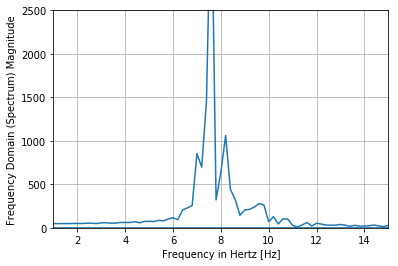

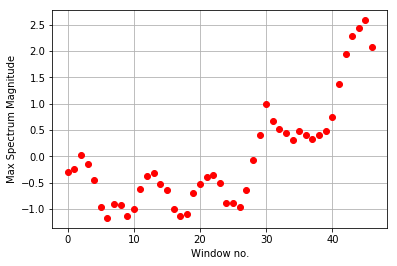

==== FFT with subjects # 1 ====


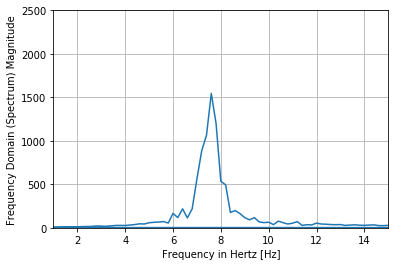

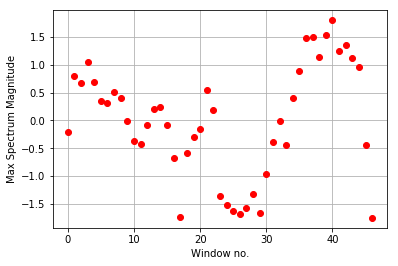

==== FFT with subjects # 2 ====


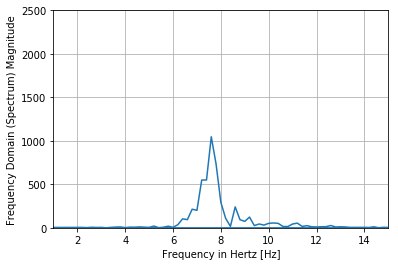

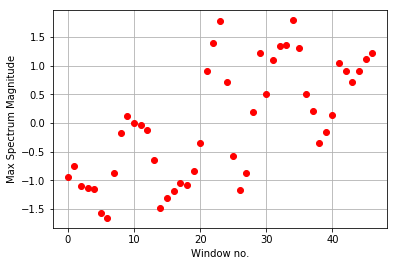

==== FFT with subjects # 3 ====


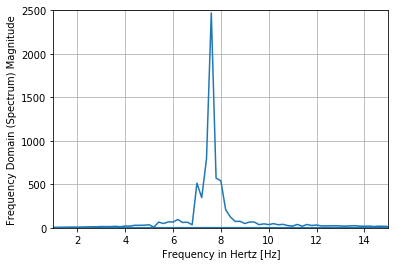

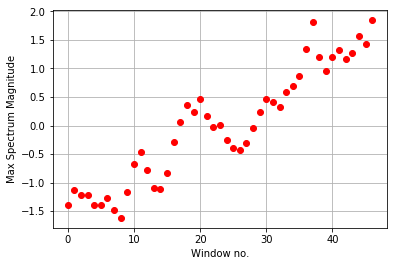

==== FFT with subjects # 4 ====


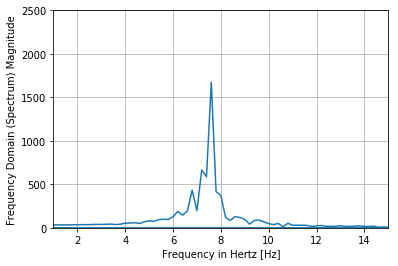

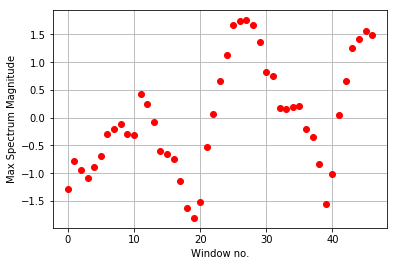

==== FFT with subjects # 5 ====


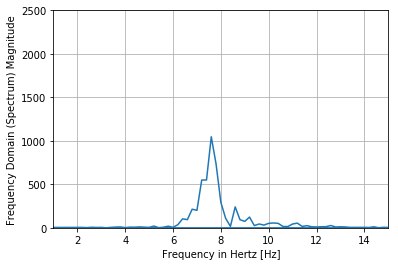

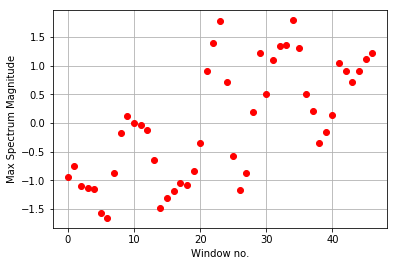

==== FFT with subjects # 6 ====


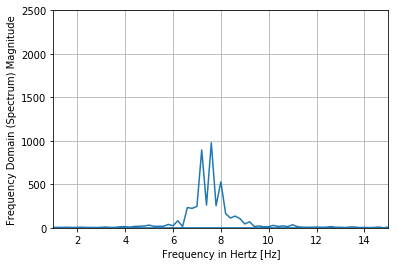

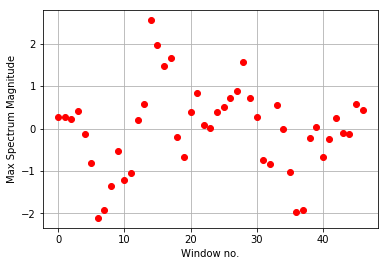

==== FFT with subjects # 7 ====


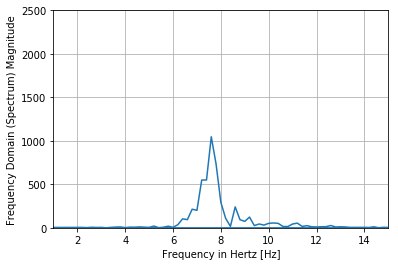

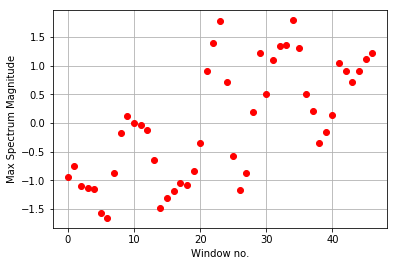

==== FFT with subjects # 8 ====


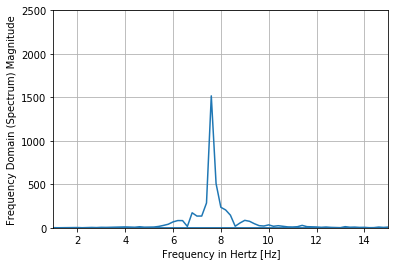

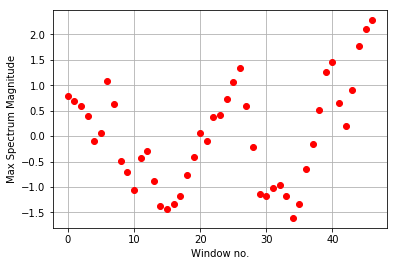

==== FFT with subjects # 9 ====


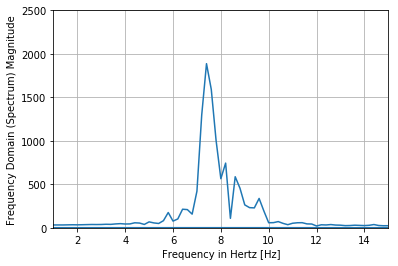

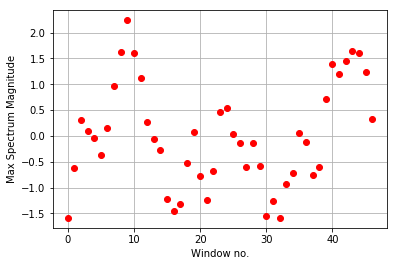

==== FFT with subjects # 10 ====


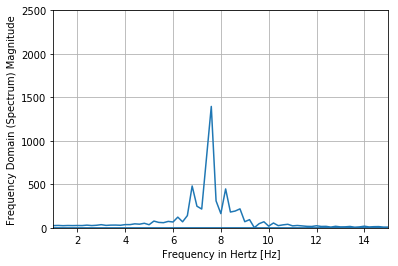

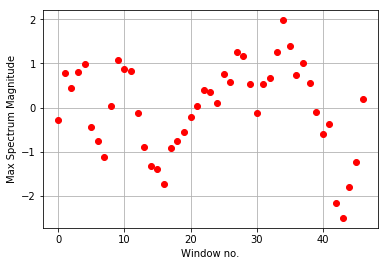

==== FFT with subjects # 11 ====


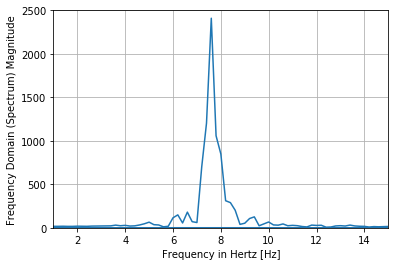

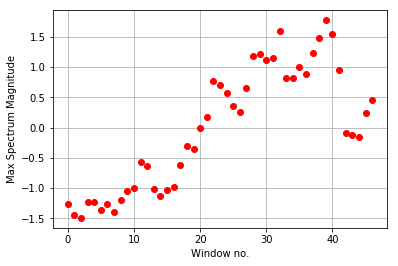

Curve fitting done!
get 3 features per each subject in this condition.

Select data from condition # 4
Size of data is 12 subjects with 12750 samplings per subject.
==== FFT with subjects # 0 ====


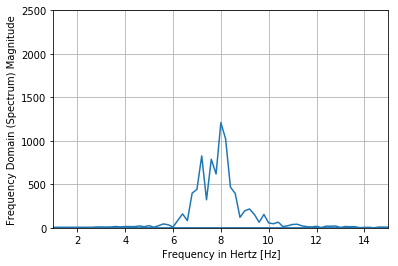

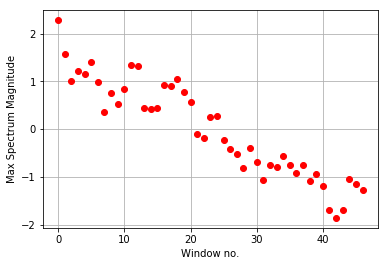

==== FFT with subjects # 1 ====


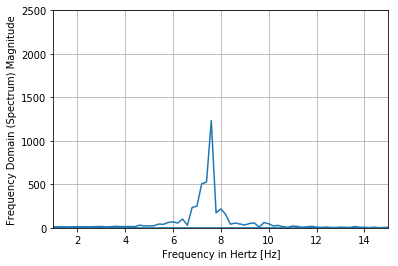

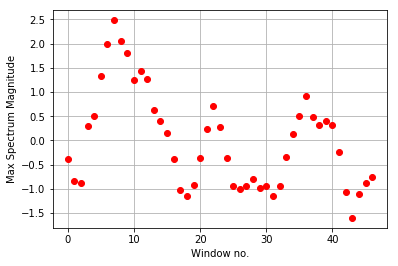

==== FFT with subjects # 2 ====


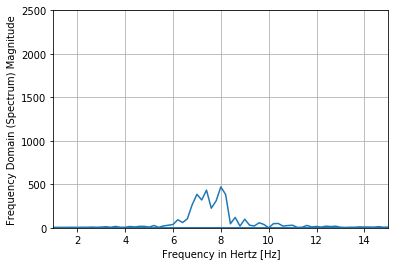

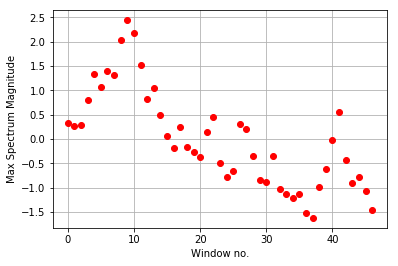

==== FFT with subjects # 3 ====


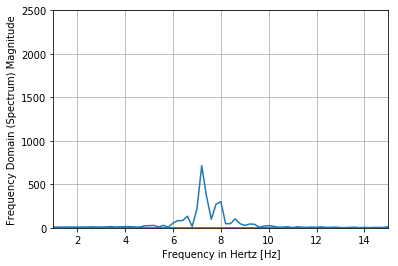

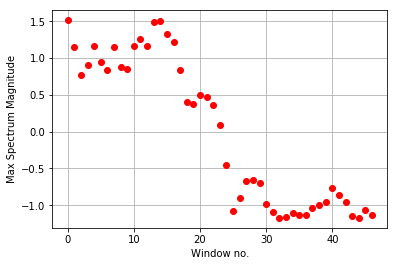

==== FFT with subjects # 4 ====


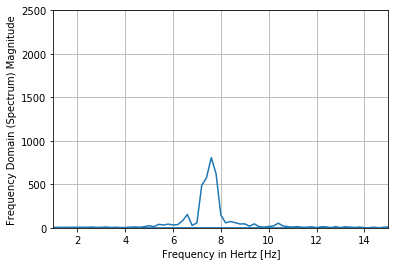

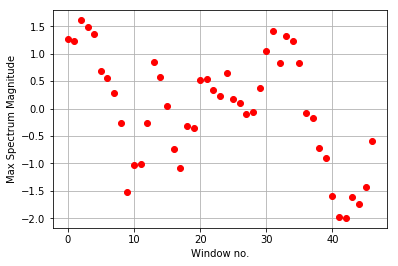

==== FFT with subjects # 5 ====


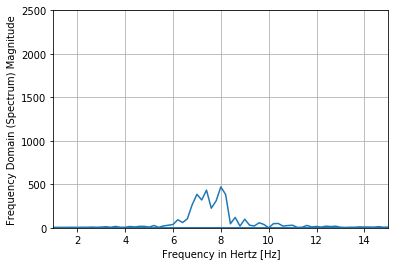

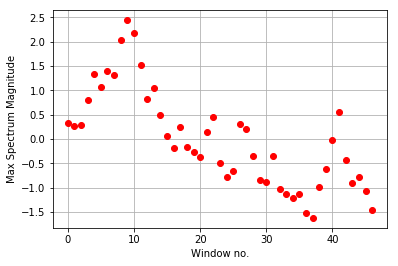

==== FFT with subjects # 6 ====


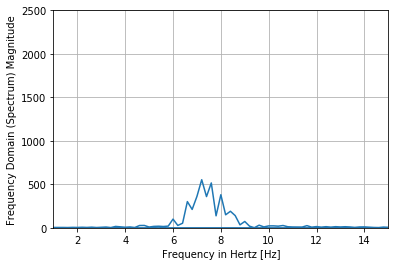

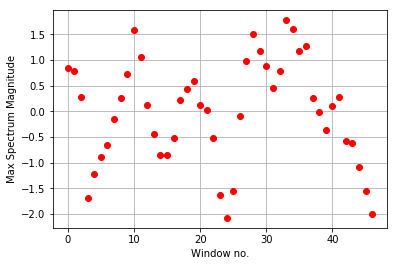

==== FFT with subjects # 7 ====


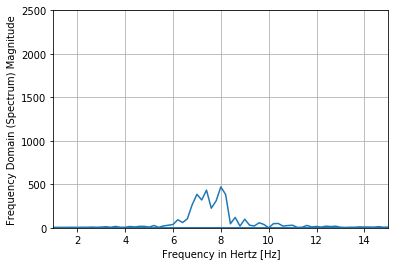

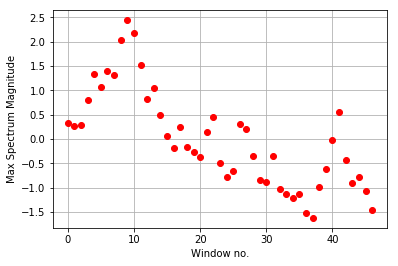

==== FFT with subjects # 8 ====


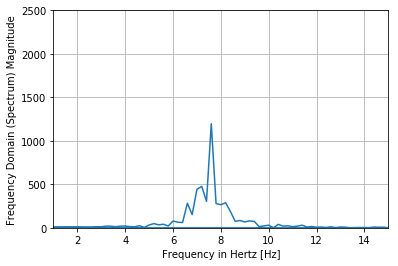

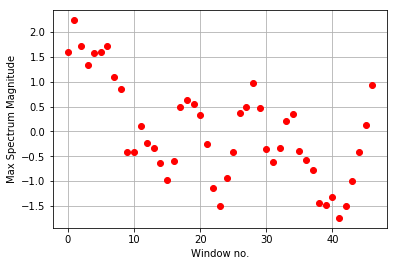

==== FFT with subjects # 9 ====


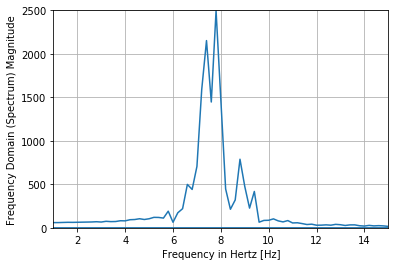

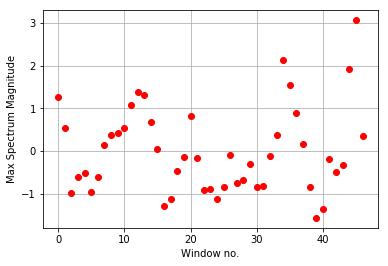

==== FFT with subjects # 10 ====


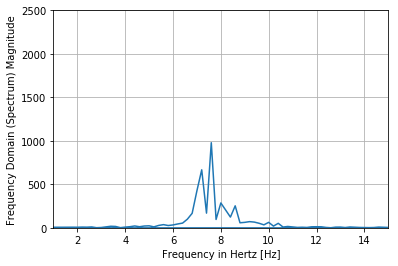

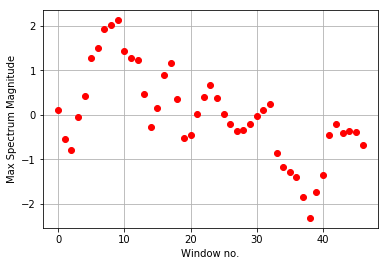

==== FFT with subjects # 11 ====


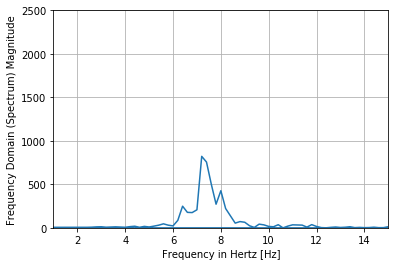

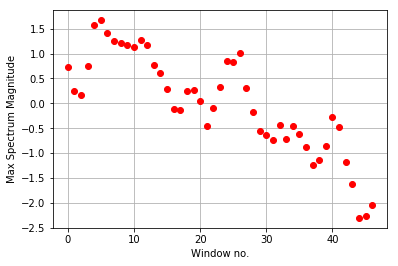

Curve fitting done!
get 3 features per each subject in this condition.

Select data from condition # 5
Size of data is 12 subjects with 12750 samplings per subject.
==== FFT with subjects # 0 ====


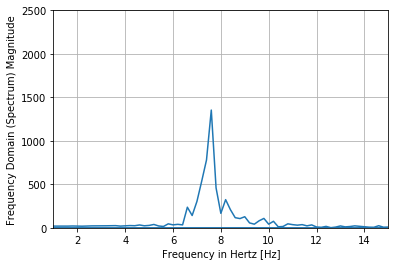

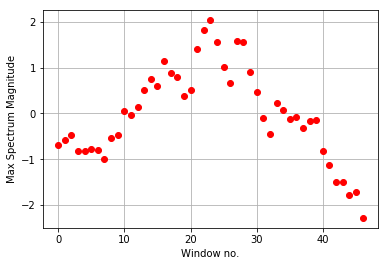

==== FFT with subjects # 1 ====


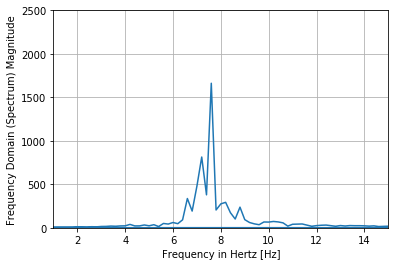

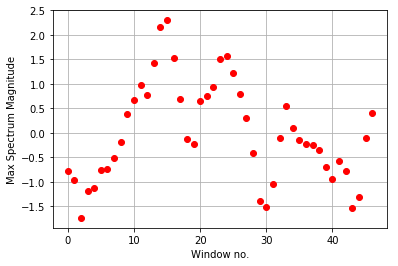

==== FFT with subjects # 2 ====


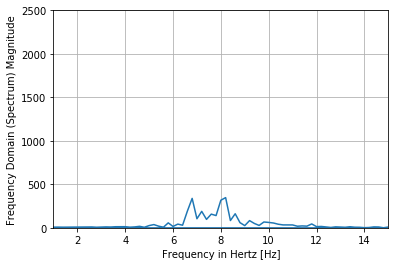

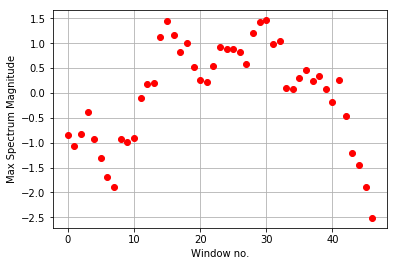

==== FFT with subjects # 3 ====


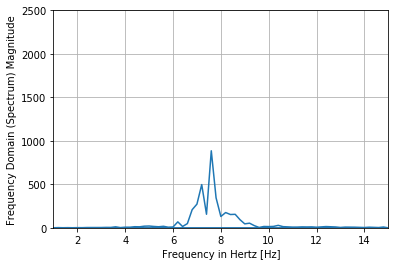

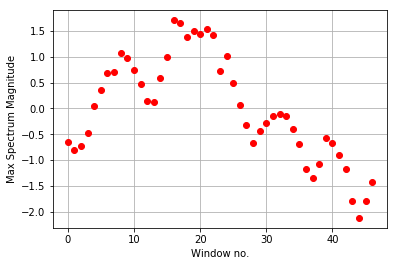

==== FFT with subjects # 4 ====


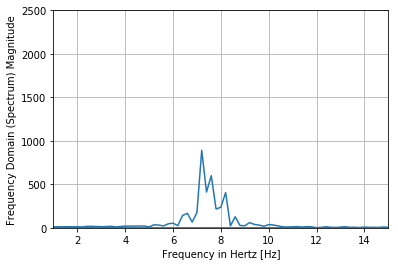

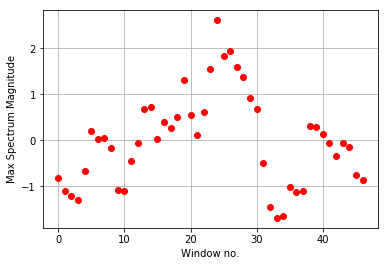

==== FFT with subjects # 5 ====


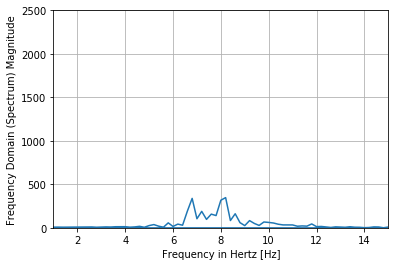

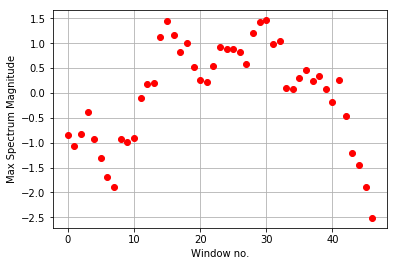

==== FFT with subjects # 6 ====


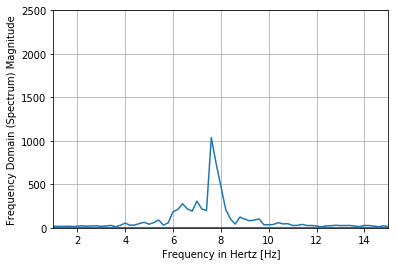

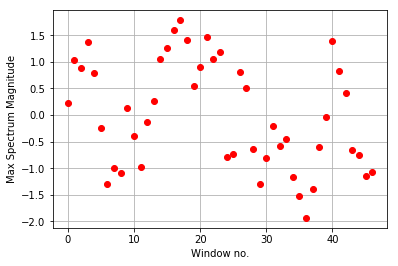

==== FFT with subjects # 7 ====


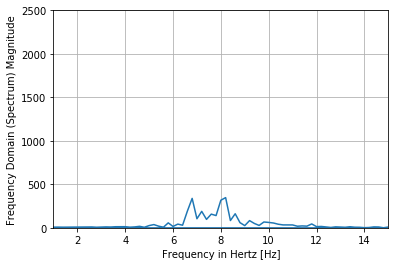

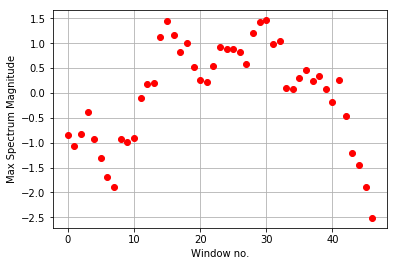

==== FFT with subjects # 8 ====


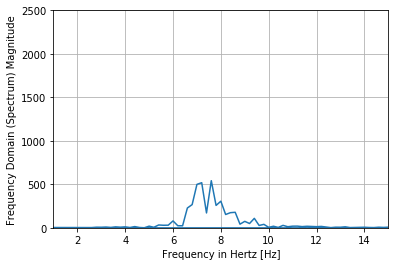

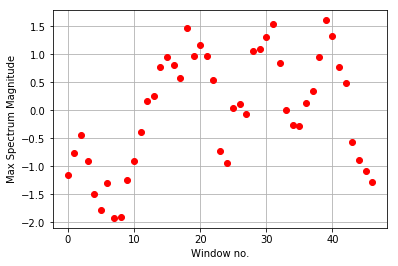

==== FFT with subjects # 9 ====


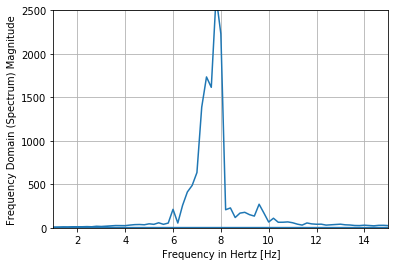

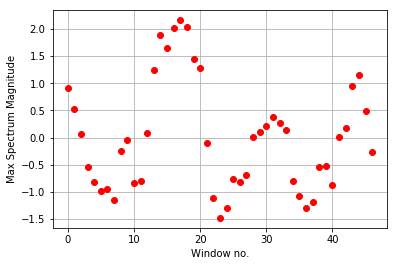

==== FFT with subjects # 10 ====


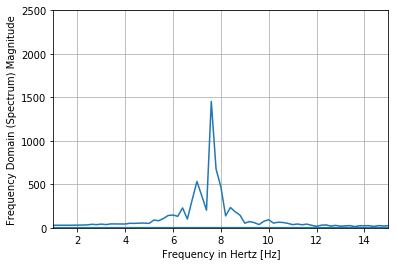

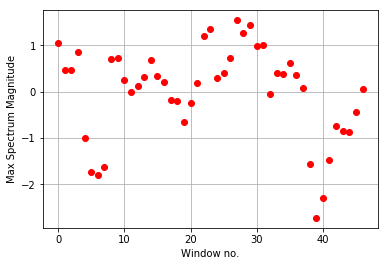

==== FFT with subjects # 11 ====


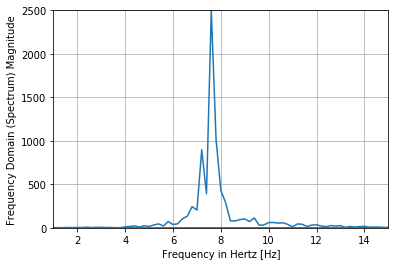

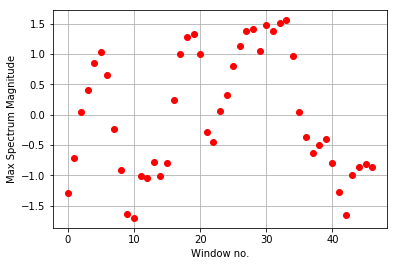

Curve fitting done!
get 3 features per each subject in this condition.



In [109]:
## get data and prepare features

#setting parameters
conditions = [3, 4, 5]
selected_windows = [0, 1, 2] # (0 = 0-4th secs, 1=1-5th sec, ...)
number_of_samplings_per_sec = 250
filtered_secs = 9
all_secs = number_of_samplings/number_of_samplings_per_sec
used_secs = all_secs - filtered_secs
number_of_filter_out_samplings = number_of_samplings_per_sec * filtered_secs
window_size = 5 #seconds
number_of_slide_windows = used_secs-window_size+1
fft_out_max_list = np.zeros((number_of_subjects, number_of_slide_windows))
degree = 3

print "Parameter setting : all =", all_secs, "seconds, used = ", used_secs, "seconds" 
print "Each subjects contains", number_of_slide_windows, "windows."

curve_coefs = []
features = np.zeros(shape = (len(conditions),number_of_subjects,len(selected_windows)))

for i, cond in enumerate(conditions):
    data_selected = get_data(data, cond)
    fft_out = perform_fft(data_selected)
    curve_coefs.append(fit_curve(range(1,number_of_slide_windows+1), fft_out, degree))
    features[i] = get_features(curve_coefs[i])
    
    print '======================================='
    print

In [121]:
def transform_features(features):
    transformed_x = np.zeros(shape = (number_of_subjects*len(conditions), len(selected_windows)))
    y = np.empty(shape = (number_of_subjects*len(conditions),1))
    
    for i in range(len(features)):
        for j in range(len(features[i])):
            transformed_x[number_of_subjects*i + j] = features[i][j]
            y[number_of_subjects*i + j] = i
    
    return transformed_x, y

In [122]:
## perform SVM
x, y = transform_features(features)
print x, y

condition id 0
subject id 0
[-0.07888893 -0.07888893 -0.07888893]
[0.]
subject id 1
[-0.21577304 -0.21577304 -0.21577304]
[0.]
subject id 2
[0.01228499 0.01228499 0.01228499]
[0.]
subject id 3
[0.05704874 0.05704874 0.05704874]
[0.]
subject id 4
[0.08095625 0.08095625 0.08095625]
[0.]
subject id 5
[0.0290387 0.0290387 0.0290387]
[0.]
subject id 6
[0.08384395 0.08384395 0.08384395]
[0.]
subject id 7
[0.03857548 0.03857548 0.03857548]
[0.]
subject id 8
[-0.06562212 -0.06562212 -0.06562212]
[0.]
subject id 9
[-0.00054877 -0.00054877 -0.00054877]
[0.]
subject id 10
[-0.01955941 -0.01955941 -0.01955941]
[0.]
subject id 11
[0.08773621 0.08773621 0.08773621]
[0.]
condition id 1
subject id 0
[-0.03100809 -0.03100809 -0.03100809]
[1.]
subject id 1
[0.07779272 0.07779272 0.07779272]
[1.]
subject id 2
[0.08400156 0.08400156 0.08400156]
[1.]
subject id 3
[0.06247173 0.06247173 0.06247173]
[1.]
subject id 4
[-0.20926534 -0.20926534 -0.20926534]
[1.]
subject id 5
[0.03096539 0.03096539 0.03096539]
[

In [ ]:
def train_test_split(x, y, test_size = 1, fix_subject = None):
    
    r = []
    if fix_subject == None:
        while True:
            status = False
            for i in range(test_size):
                rand = 0
                while True:
                    rand = randint(0, number_of_subjects-1)
                    if rand not in r:
                        break
                    else:
                        print rand, r
                r.append(rand)

            for ri in rand_indices:
                if set(ri) == set(r):
                    r = []
                    status = True
                    break

            if not status:
                break
    else:
        r = [fix_subject]
            
            
    print "Random result: subject #", r, "is test set."
    rand_indices.append(r)
    
    y_test = np.array([y[i] for i in r][0])
    y_train = np.array([y[i] for i in range(number_of_subjects) if i not in r])
    x_tr = np.zeros(shape = ((number_of_subjects-test_size)*number_of_slide_windows, 1))
    y_tr = np.zeros(shape = ((number_of_subjects-test_size)*number_of_slide_windows, 1))
    x_te = np.zeros(shape = (number_of_slide_windows, 1))
    y_te = np.zeros(shape = (number_of_slide_windows, 1))
    
    x_tr =x[1:number_of_subjects-test_size+1].reshape(-1,1)
    y_tr =y_train.reshape(-1,1)
    x_te =x[1:test_size+1].reshape(-1,1)
    y_te =y_test.reshape(-1,1)
        
    return x_tr, \
            x_te, \
            y_tr, \
            y_te, \
            r

In [ ]:
def write_result_to_csv(filename, results):
    print 'Start writing results from', len(results[0]), 'subjects'
    csvfile1 = open(filename + '_RMSE.csv', 'wb')
    csvfile2 = open(filename + '_testscore.csv', 'wb')
    
    wr1 = csv.writer(csvfile1, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    wr2 = csv.writer(csvfile2, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
        
    wr1.writerow(['subject_id', 'RMSE_'+str(reduce_result_proportion[0]*100)+'%', \
                  'RMSE_'+str(reduce_result_proportion[1]*100)+'%', \
                  'RMSE_'+str(reduce_result_proportion[2]*100)+'%'])
    wr2.writerow(['subject_id', 'testscore_'+str(reduce_result_proportion[0]*100)+'%', \
              'testscore_'+str(reduce_result_proportion[1]*100)+'%', \
              'testscore_'+str(reduce_result_proportion[2]*100)+'%'])
    
    for i in range(0, number_of_subjects):
        wr1.writerow([i, results[0][i]['RMSE'], results[1][i]['RMSE'], \
                      results[2][i]['RMSE']])
        wr2.writerow([i, results[0][i]['test_score'], results[1][i]['test_score'], \
                      results[2][i]['test_score']])
    
    csvfile1.close()
    csvfile2.close()
    
    print 'Finish writing :', filename

In [ ]:
## Non-Linear Regression by me

# set params
test_set_fraction = 1.0/12
test_size = 1
rand_indices = []
results = []
number_of_cv_rounds = number_of_subjects
intensity_step = 3
first_light_intensity_begin = 105
last_light_intensity_begin = (number_of_slide_windows * intensity_step) + first_light_intensity_begin
print "Parameter settings: 1st window start at intensity =", first_light_intensity_begin, \
        ", end at intensity =", last_light_intensity_begin, \
        ", cross validation =", number_of_cv_rounds
print

# Test/train split
light_intensity = np.arange(first_light_intensity_begin, last_light_intensity_begin, intensity_step)
light_intensity = np.tile(light_intensity,(number_of_subjects,1))

## prepare list to store results
results = []
reduce_result_proportion = [0.3, 0.6, 1]
filename = './my_results'

for c, r in enumerate(reduce_result_proportion):
    print '#### Begin calculate with result proportion =', r, '####'
    results.append([])
    
    for i in range(0, number_of_cv_rounds):
        X_train, X_test, y_train, y_test, subject_id = train_test_split(x = light_intensity, y = fft_out_max_list, \
                                                                test_size=test_size, fix_subject = i)
        print "X_train :", len(X_train), ", X_test :", len(X_test), ", y_train :", len(y_train), ", y_test :", len(y_test)
        print
        
        X_train = X_train[:int(len(X_train)*r)]
        X_test = X_test[:int(len(X_test)*r)]
        y_train = y_train[:int(len(y_train)*r)]
        y_test = y_test[:int(len(y_test)*r)]

        ## non-linear regression
        model = prep.PolynomialFeatures(degree=3)
        X_tr = model.fit_transform(X_train, y_train)
        X_te = model.fit_transform(X_test)

        clf = linear_model.LinearRegression()
        clf.fit(X_tr, y_train)
        y_pred = clf.predict(X_te)

        # calculate Root Mean Square Error
        RMSE = np.sqrt(np.sum(np.square(y_pred-y_test))/ len(y_pred))
        test_score = clf.score(X_te,y_test)
        print "Round :", i, ", RMSE:", RMSE, ", test_score:", test_score
        
        #store results
        results[c].append(dict({
            'subject_id' : subject_id,
            'RMSE' : RMSE,
            'test_score' : test_score
        }))

        ## plot non-linear regression result
        x = list(itertools.islice(itertools.count(), first_light_intensity_begin, last_light_intensity_begin, intensity_step))
        x = x[:int(len(x)*r)]
        fig = plt.figure()
        ax1 = fig.add_subplot(111)

        ax1.scatter(x, y_pred, s=10, c='b', marker="s", label='pred')
        ax1.scatter(x, y_test, s=10, c='r', marker="o", label='actual')
        plt.legend(loc='upper left');
        plt.show()
        
    print 'Store results of', len(results[c]), 'subjects done!'
    print
    
write_result_to_csv(filename, results)